Notebook to test how well we can perform differential imaging in the sky frame using
flt images converted into a common frame by astrodrozzle


In [1]:
from astropy.io import fits
from stwcs import updatewcs
from drizzlepac import astrodrizzle, ablot, tweakreg
import glob, os, shutil
from multiprocessing import Pool
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Pool
from matplotlib.colors import PowerNorm
from stsci.tools import teal
from scipy.stats import sigmaclip
from AD_STP_utils.differential_imaging import driz_all,blot_back,subtract


%matplotlib notebook

The following tasks in the stwcs.gui package can be run with TEAL:
     apply_headerlet          archive_headerlet          attach_headerlet     
     delete_headerlet         extract_headerlet         headerlet_summary     
    restore_headerlet             updatewcs              write_headerlet


The following task in the fitsblender package can be run with TEAL:
                                  blendheaders                                  
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol


In [2]:
#Setup the working directory and change into it

wdir = '/user/gennaro/Functional_work/WFC3_persistence/py_progs/short_term_persistence/Test_data/Test_2min1/'
os.chdir(wdir)

<IPython.core.display.Javascript object>


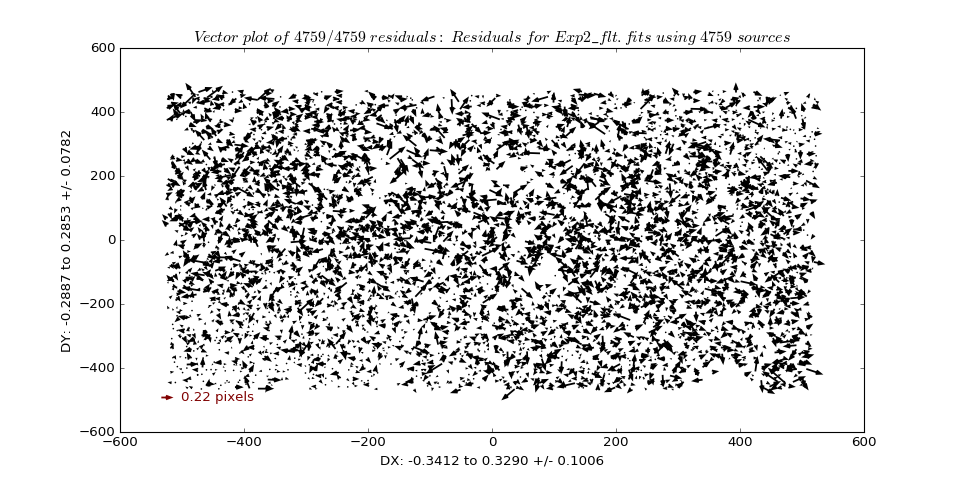

Exp1_flt.fits F140W 21:32:57 0.0 0.0 352.939514 F140W
Exp2_flt.fits F140W 21:39:56 2.23685 1.99913 352.939514 F140W


In [3]:
# Prepare the sorted list of flt file to be processed
# Print the exposure information 

flts = sorted(glob.glob('*flt.fits'))

#mn = np.amin([np.amin(fits.getdata(f)) for f in flts])
mn = 0

fig = plt.figure(figsize=(12,6))

for i,f in enumerate(flts):
    fhdr = fits.getheader(f)
    print(f, fhdr['FILTER'], fhdr['TIME-OBS'], fhdr['POSTARG1'], fhdr['POSTARG2'], fhdr['EXPTIME'], fhdr['FILTER'])
    
    ax1 = fig.add_subplot(1,len(flts),i+1)
    im = ax1.imshow(np.log10(fits.getdata(f)-mn),cmap='viridis', interpolation='none',origin='lower')
#    im = ax1.imshow(fits.getdata(f),cmap='viridis', interpolation='none')
    ax1.set_title(f)
    fig.colorbar(im, ax=ax1)
    

Validation warnings for: /Users/gennaro/.teal/imagefindpars.cfg
	"roundhi" is missing.
	"use_sharp_round" is missing.
	"sharplo" is missing.
	"ratio" is missing.
	"dqbits" is missing.
	"roundlo" is missing.
	"sharphi" is missing.
	"theta" is missing.
Setting up logfile :  tweakreg.log

TweakReg Version 1.4.2(22-Sep-2014) started at: 17:10:56.227 (21/01/2017)

Version Information

--------------------

Python Version 3.5.1 |Continuum Analytics, Inc.| (default, Dec  7 2015, 11:24:55)
[GCC 4.2.1 (Apple Inc. build 5577)]

numpy Version -> 1.10.4 

astropy Version -> 1.1.2 

stwcs Version -> 1.2.3.dev 


Finding shifts for: 

    Exp1_flt.fits

    Exp2_flt.fits

===  Source finding for image 'Exp1_flt.fits':

  #  Source finding for 'Exp1_flt.fits', EXT=('SCI', 1) started at: 17:11:02.036 (21/01/2017)

     Found 7876 objects.

===  Found a TOTAL of 7876 objects in image 'Exp1_flt.fits'



===  Source finding for image 'Exp2_flt.fits':

  #  Source finding for 'Exp2_flt.fits', EXT=('SCI', 

<IPython.core.display.Javascript object>


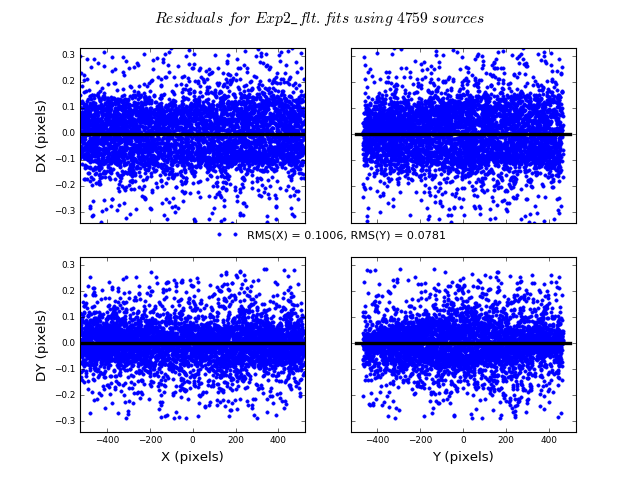


....Updating header for Exp2_flt.fits...


Processing Exp2_flt.fits['SCI',1]

Updating header for Exp2_flt.fits[1]

WCSNAME  :  TWEAK

Trailer file written to:  tweakreg.log



In [4]:
tweakreg.TweakReg(flts,writecat=False,clean=True,interactive=False,conv_width=2.5,
                  updatehdr=True,use2dhist=False,see2dplot=False,reusename=True,
                  maxflux=-20,minflux=-13,fluxunits='mag',fluxcol=3)

In [11]:
# Create the drz images

ad_dict = {'median':False,
           'blot':False,
           'build':True,
           'driz_sep_kernel':'lanczos3',
           'driz_sep_scale':0.13,
           'driz_cr':False,
           'driz_sep_outnx':960,
           'driz_sep_outny':1080,
           'final_wcs':True,
           'final_rot':None,
           'final_scale':None,
           'final_outnx':None,
           'final_outny':None,
           'driz_combine':False,
           'num_cores':4
          }

driz_all(flts, ad_dict, drzext = 'single_sci')



#

Ref: Exp1_single_sci.fits
INPUT_DICT: {'final_refimage': 'Exp1_single_sci.fits', 'median': False, 'blot': False, 'final_rot': None, 'num_cores': 4, 'driz_sep_outnx': 960, 'build': True, 'input': 'Exp1_flt.fits', 'final_outny': None, 'final_wcs': True, 'final_scale': None, 'final_outnx': None, 'driz_sep_scale': 0.13, 'driz_sep_outny': 1080, 'driz_sep_refimage': 'Exp1_single_sci.fits', 'driz_sep_kernel': 'lanczos3', 'driz_cr': False, 'driz_combine': False}
Setting up logfile :  astrodrizzle.log

AstroDrizzle Version 2.1.3.dev(1-Feb-2016) started at: 17:23:22.612 (21/01/2017)

==== Processing Step  Initialization  started at  17:23:23.243 (21/01/2017)

********************************************************************************

*

*  Estimated memory usage:  up to 19 Mb.

*  Output image size:       1083 X 959 pixels. 

*  Output image file:       ~ 11 Mb. 

*  Cores available:         1

*

********************************************************************************

==== Proces

<IPython.core.display.Javascript object>


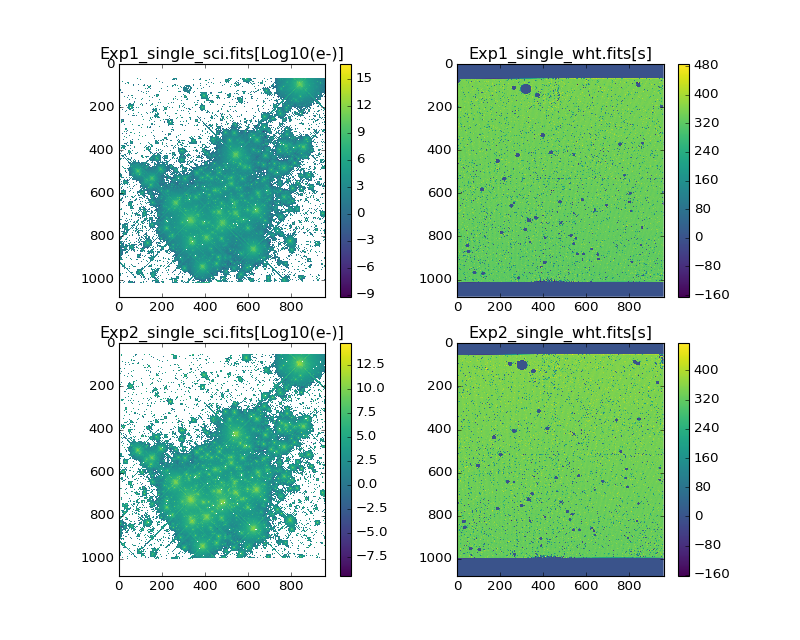

/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log
/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log


In [12]:
# Plot AD results

fig = plt.figure(figsize=[10,8])

drzs = sorted(glob.glob('*single_sci.fits'))
whts = sorted(glob.glob('*single_wht.fits'))

#mn = np.amin([np.amin(fits.getdata(f)) for f in drzs])
mn = 0

for i,f in enumerate(drzs):
    ax1 = fig.add_subplot(2,len(drzs),2*i+1)
    im1 = ax1.imshow(np.log(fits.getdata(f)-mn),cmap='viridis', interpolation='none')
    ax2 = fig.add_subplot(2,len(drzs),2*i+2)
    im2 = ax2.imshow(fits.getdata(whts[i]),cmap='viridis', interpolation='none')

    ax1.set_title(str(f)+'[Log10(e-)]')
    ax2.set_title(str(whts[i])+'[s]')
    
    fig.colorbar(im1, ax=ax1)
    fig.colorbar(im2, ax=ax2)


/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


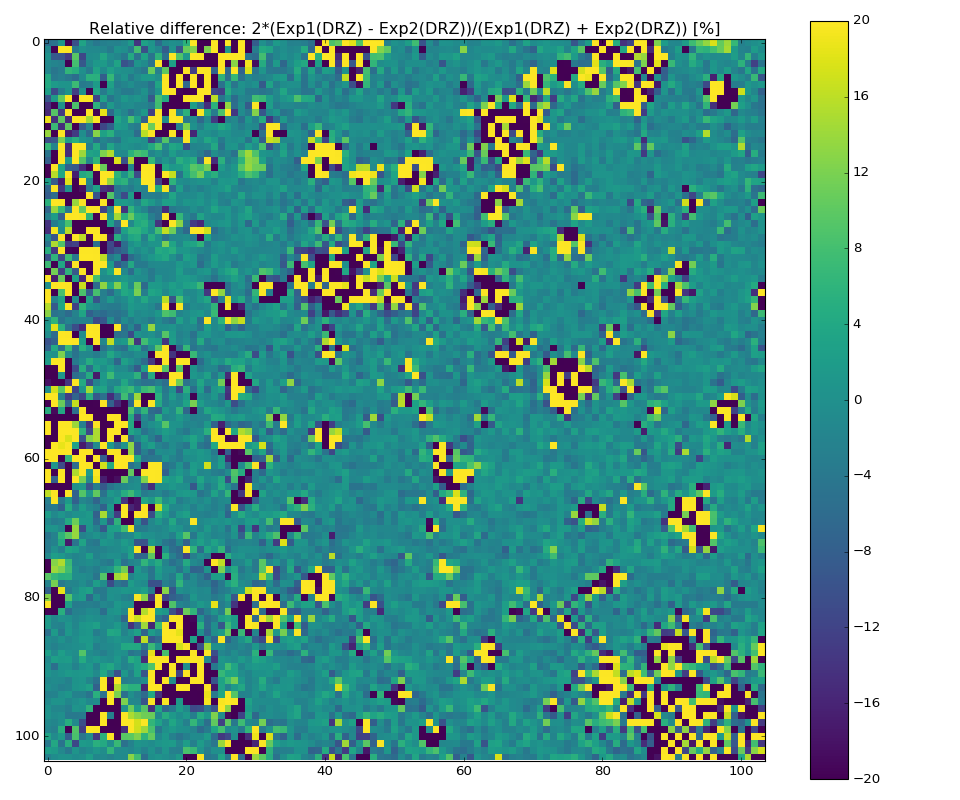

-0.0538639 0.0 1.2066
20.2537 0.0 17848.5


In [13]:
#Plot the relative difference and the absolute difference

drzs = sorted(glob.glob('*single_sci.fits'))
ddrz = 200.*(fits.getdata(drzs[0])-fits.getdata(drzs[1]))/(fits.getdata(drzs[0])+fits.getdata(drzs[1]))
fig = plt.figure(figsize=[12,10])

ax1 = fig.add_subplot(1,1,1)
im1 = ax1.imshow(ddrz[248:352,248:352],cmap='viridis', interpolation='none',vmin=-20,vmax=20)
plt.colorbar(im1,ax=ax1)

#ax2 = fig.add_subplot(1,3,2)
#im2 = ax2.imshow(fits.getdata(drzs[0])-fits.getdata(drzs[1]),cmap='RdYlBu', interpolation='none',vmin=-1e3,vmax=1e3)
#plt.colorbar(im2,ax=ax2)

#ax3 = fig.add_subplot(1,3,3)
#im3 = ax3.imshow(np.log10(fits.getdata(drzs[0])/fits.getdata(drzs[1])),cmap='RdYlBu', interpolation='none',vmin=-.2,vmax=.2)
#plt.colorbar(im3,ax=ax3)

ax1.set_title('Relative difference: 2*(Exp1(DRZ) - Exp2(DRZ))/(Exp1(DRZ) + Exp2(DRZ)) [%]')
#ax2.set_title('Absolute difference [e-]')
#ax3.set_title('Log10 (ratio)')

plt.tight_layout()

ddrz = (fits.getdata(drzs[0])-fits.getdata(drzs[1]))
ddrz = ddrz[np.isfinite(ddrz)]
c, low, upp = sigmaclip(ddrz, 3,3)
print(np.mean(c),np.median(c),np.std(c))
print(np.mean(ddrz),np.median(ddrz),np.std(ddrz))


/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Javascript object>


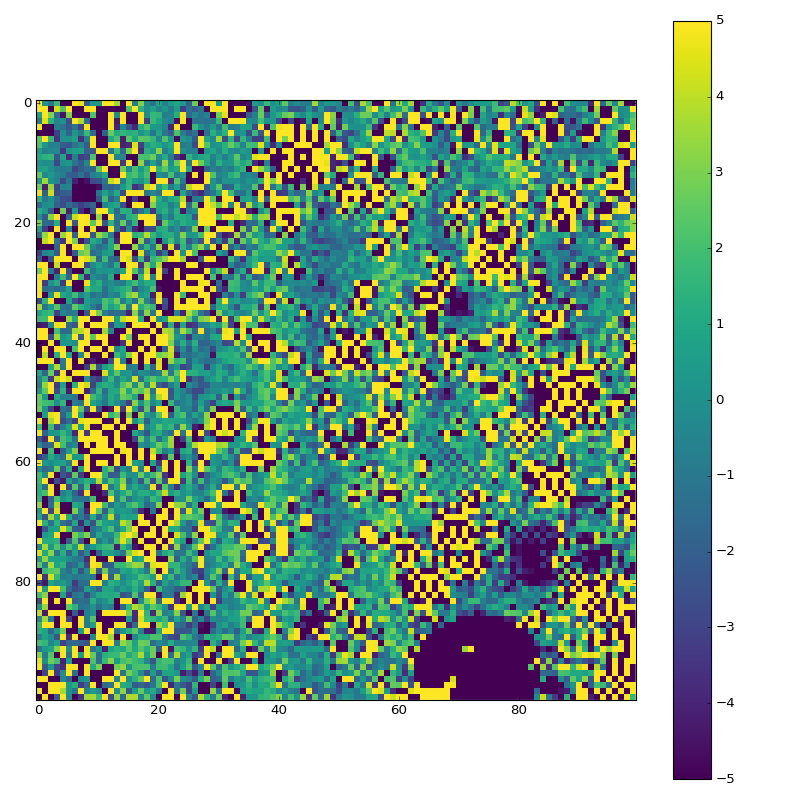

-0.261973 -0.0612701 5.93242
-0.297886 -0.131167 134.846


<IPython.core.display.Javascript object>


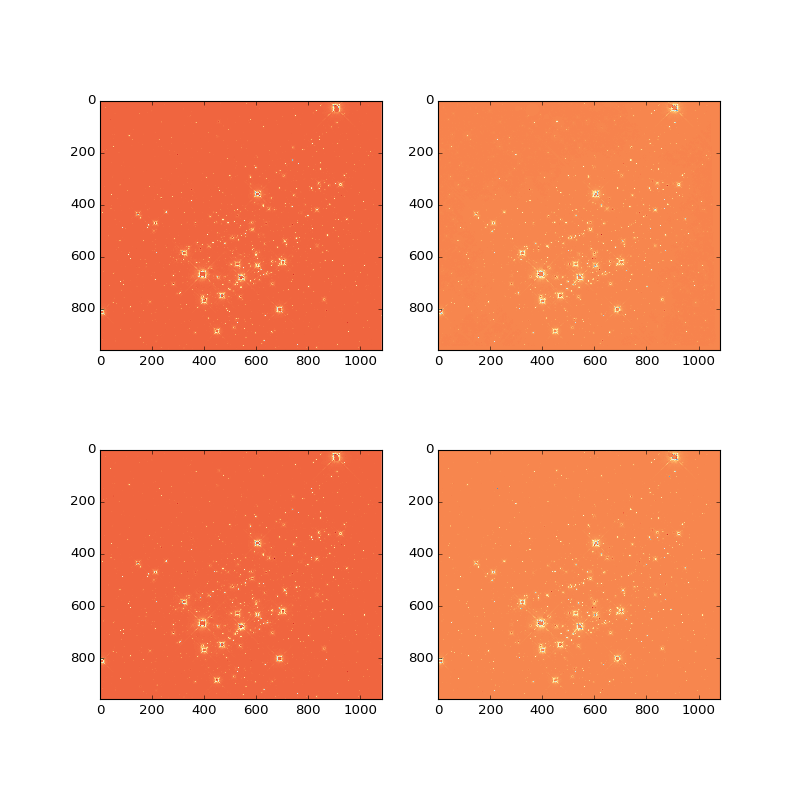

In [8]:
whts = sorted(glob.glob('*single_wht.fits'))
cnts = []
pvar = []

RN = 12

for drz,wht in zip(drzs,whts):
    pvar.append((fits.getdata(drz)+fits.getheader(drz)['MDRIZSKY'])*fits.getdata(wht)+RN**2)
    cnts.append(fits.getdata(drz)*fits.getdata(wht))
    
ddrz = (cnts[0]-cnts[1])/np.sqrt(pvar[0]+pvar[1])
plt.figure(figsize=[10,10])
plt.imshow(ddrz[250:350,250:350],cmap='viridis', interpolation='none',vmin=-5,vmax=5)
plt.colorbar()
plt.tight_layout() 

ddrz = ddrz[np.isfinite(ddrz)]
c, low, upp = sigmaclip(ddrz, 3,3)
print(np.mean(c),np.median(c),np.std(c))
print(np.mean(ddrz),np.median(ddrz),np.std(ddrz))


f2 = plt.figure(figsize=(10,10))
ax1 = f2.add_subplot(2,2,1)
ax1.imshow(cnts[0],cmap='RdYlBu', interpolation='none')
ax2 = f2.add_subplot(2,2,2)
ax2.imshow(cnts[1],cmap='RdYlBu', interpolation='none')
ax3 = f2.add_subplot(2,2,3)
ax3.imshow(pvar[0],cmap='RdYlBu', interpolation='none')
ax4 = f2.add_subplot(2,2,4)
ax4.imshow(pvar[1],cmap='RdYlBu', interpolation='none')



<IPython.core.display.Javascript object>


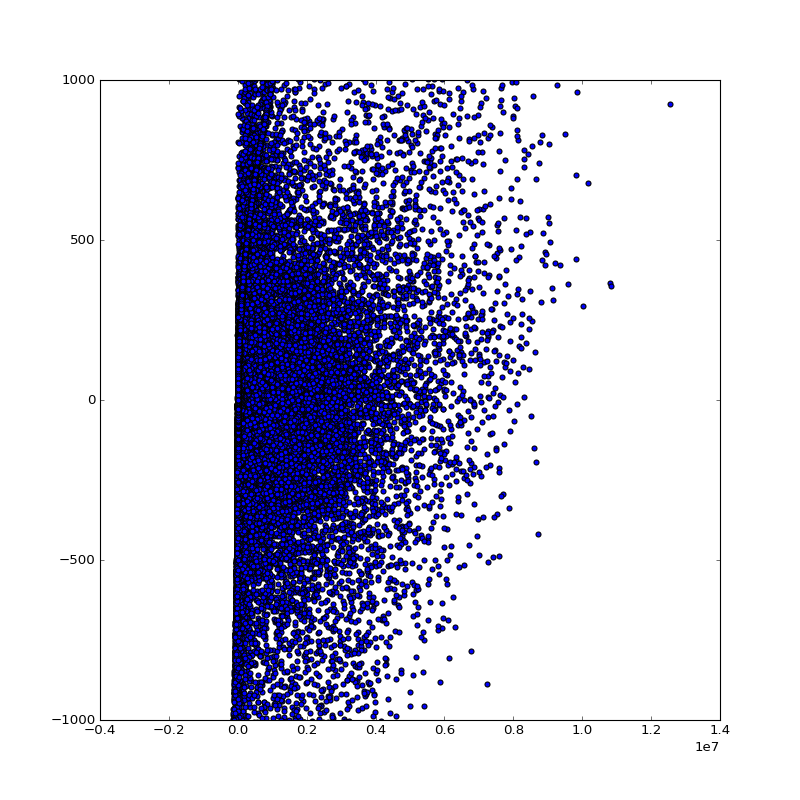

/Users/gennaro/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


(-1000, 1000)

In [12]:
fig = plt.figure(figsize=(10,10))

ddrz = (cnts[0]-cnts[1])/np.sqrt(pvar[0]+pvar[1])

plt.scatter(cnts[0],ddrz)
plt.ylim(-1000,1000)

In [ ]:
fhdr